Title: 
 Fireflies, Meteors, and Milky Way
Date:
 2025-08-02
 
 URL: https://apod.nasa.gov/apod/image/2508/DeltaAqrFireflies1024.jpg
HD URL: https://apod.nasa.gov/apod/image/2508/DeltaAqrFireflies.jpg

Description:
 Taken on July 29 and July 30, a registered and stacked series of exposures creates this dreamlike view of a northern summer night. Multiple firefly flashes streak across the foreground as the luminous Milky Way arcs above the horizon in the Sierra de Órganos national park of central Mexico, The collection of bright streaks aligned across the sky toward the upper left in the timelapse image are Delta Aquariid meteors. Currently active, the annual Delta Aquarid meteor shower shares August nights though, overlapping with the better-known Perseid meteor shower. This year that makes post-midnight, mostly moonless skies in early August very popular with late night skygazers. How can you tell a Delta Aquariid from a Perseid meteor?  The streaks of Perseid meteors can be traced bac

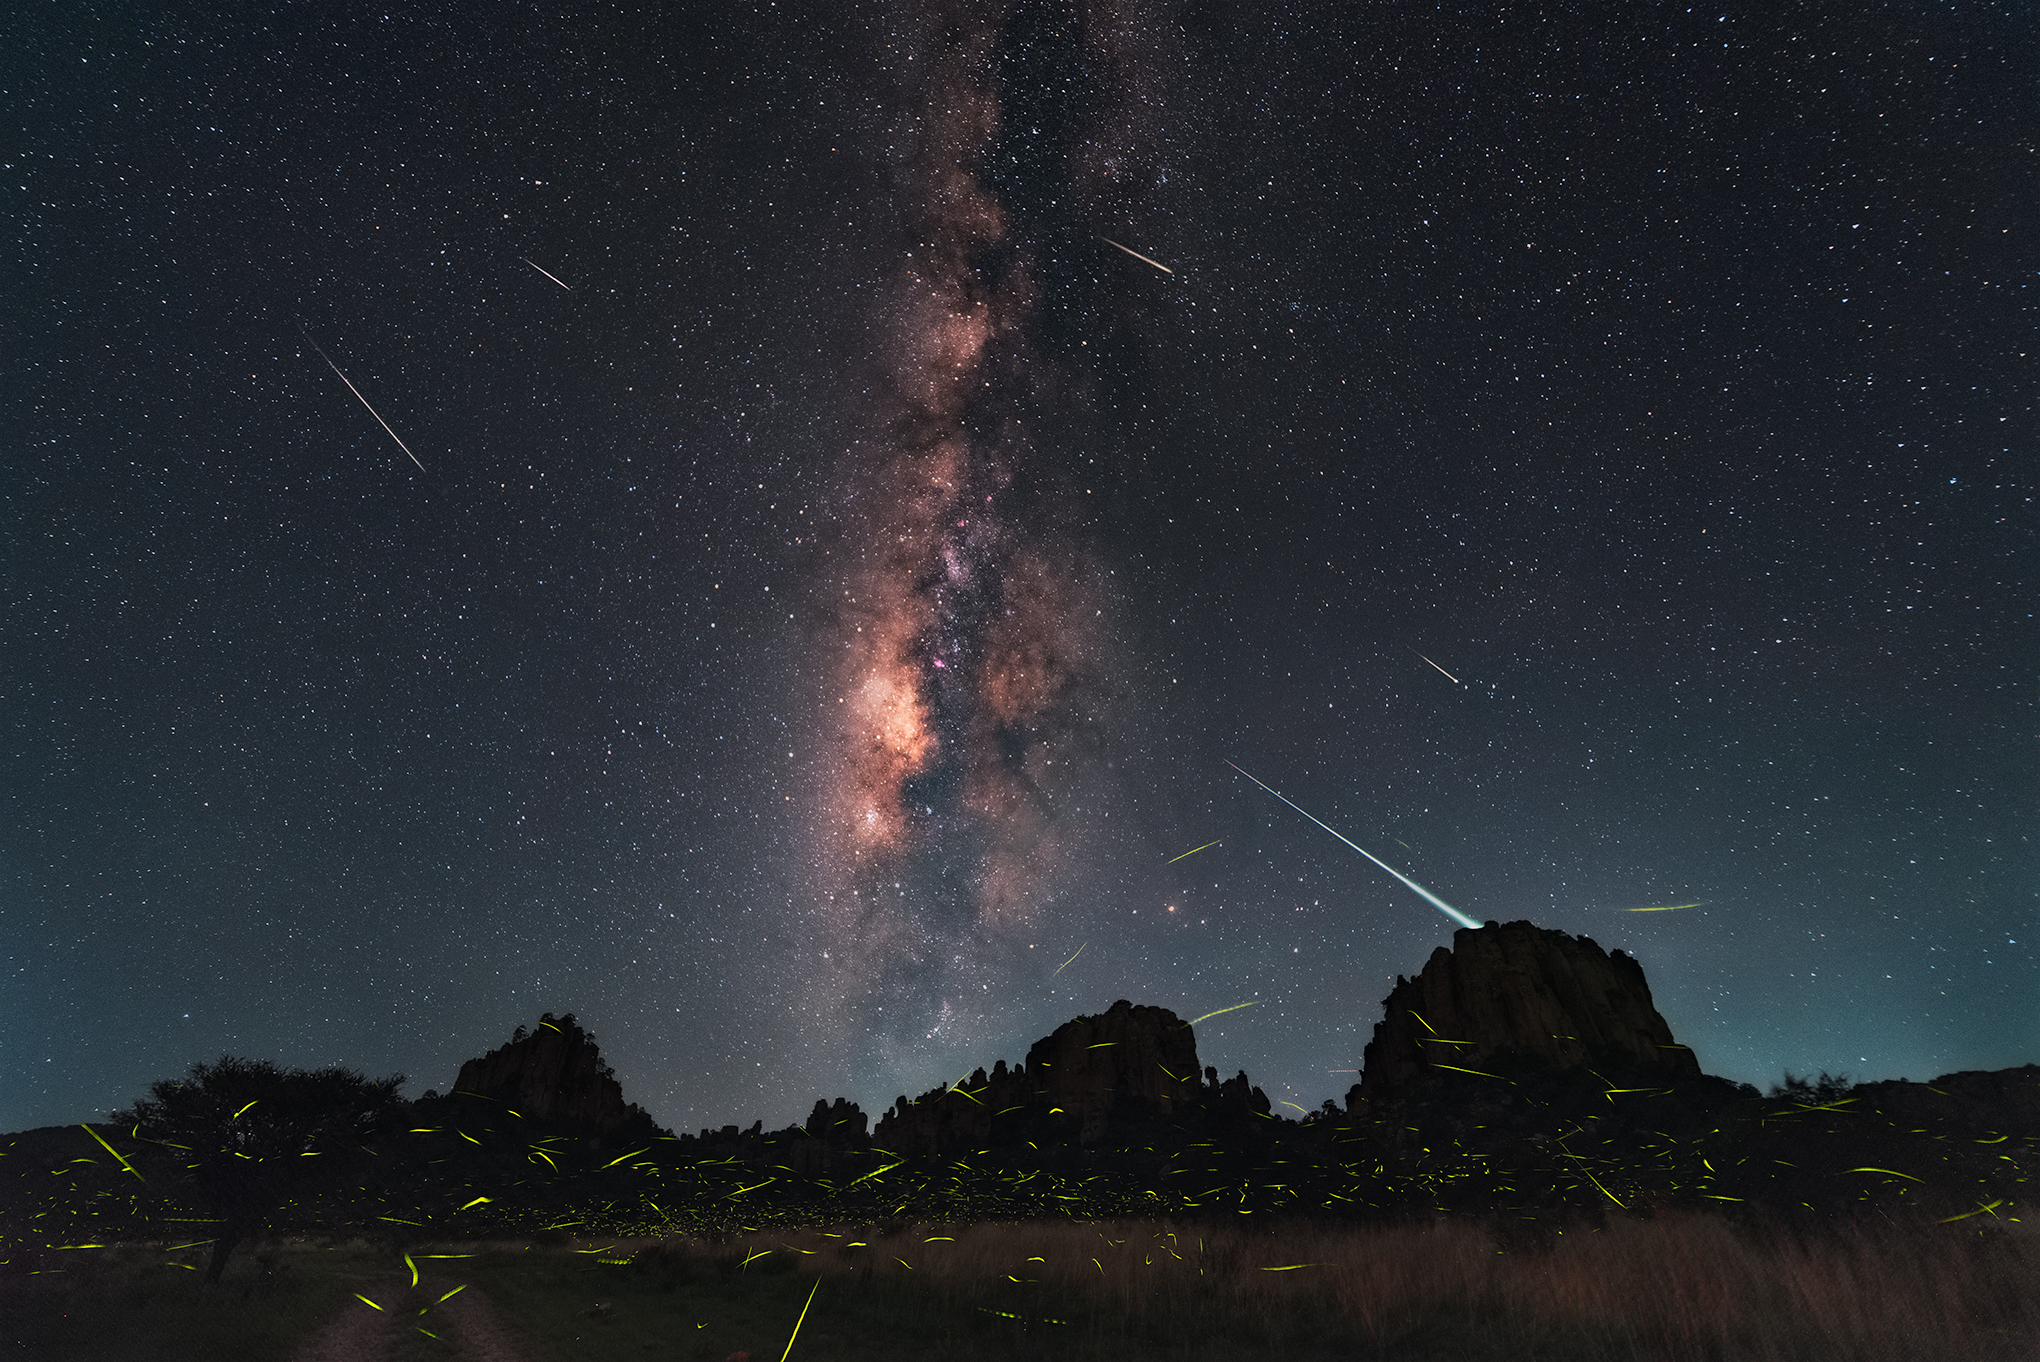

In [8]:
# Import the necessary packages:

# Imports the requests library for sending HTTP requests
import requests 

# Import the os module to interact with the operating system (for environment variables like API)
import os

# importing the load_dotenv function from the python-dotenv library
# It loads variables from a .env file into your system’s environment variables
# to keep sensitive information outside of the code
from dotenv import load_dotenv 

# Load the API key:
load_dotenv()
# Access the NASA API key stored in the .env file
api_key = os.getenv("NASA_API_KEY") # Get the API key from an environment variable called 'NASA_API_KEY'

# Base URL for the NASA API
Apod_url = "https://api.nasa.gov/planetary/apod"

# Packs the query parameters into a dictionary
params = {
    "api_key": api_key, # My NASA API key
    "date": "2025-08-02", # Specific date (YYYY-MM-DD)
    "thumbs": "True" #Return video thumbnails if the APOD is a video
}

# Sends a GET request to the APOD API with the parameters
response = requests.get(Apod_url, params=params)

# Convert the response to JSON format
data = response.json()
# print(data)

# Display the information about the APOD
print("Title: \n", data["title"])
print("Date:\n", data["date"])
print(" \n URL:", data["url"])
print("HD URL:", data["hdurl"])
print("\nDescription:\n", data["explanation"])

image_url = data["hdurl"]
image_data = requests.get(image_url).content

# Save the image as "apod.jpg" in the current directory
with open("apod.jpg", "wb") as file:
    file.write(image_data)

print("\nThe HD image has been downloaded as 'apod.jpg'")

from IPython import display
display.Image("apod.jpg")


In [19]:
NEO_url = "https://api.nasa.gov/neo/rest/v1/feed"
api_key = os.getenv("NASA_API_KEY")

params = {
    "start_date": "2025-07-30",
    "end_date": "2025-08-02",
    "api_key": api_key
}

response = requests.get(NEO_url, params= params)

if response.status_code == 200:
    data = response.json()
    # print(data)
    print(data.keys())
else:
    print(f"Error: {response.status_code}")


date = data["near_earth_objects"].keys() #date = the keys of the neo dic

print("Date:", date)   #The "near_earth_objects" key maps each date to a list of asteroid dictionaries.

asteroids = []
for date in data["near_earth_objects"]:
    asteroids.extend(data["near_earth_objects"][date])

import pandas as pd 

df = pd.DataFrame(asteroids) # df = data frame
print("DataFrame:", df)

cleaned_data = []

for asteroid in asteroids:
    cleaned_data.append({
        "Asteroid ID": asteroid.get("id"),
        "Asteroid name": asteroid.get("name"),
        "The Minimal estimated diameter in Km": asteroid.get("estimated_diameter",{}) .get("kilometers",{}) .get("estimated_diameter_min"),
        "Absolute_magnitude": asteroid.get("absolute_magnitude_h"),
        "Relative velocity(Km/s)": asteroid.get("close_approach_data", [{}])[0] .get("relative_velocity", {}) .get("kilometers_per_second")
    })

df_cleaned = pd.DataFrame(cleaned_data)
# print("Cleaned data:",df_cleaned.head())
df_cleaned.to_csv("cleaned_asteroids_data.csv", index=False)


dict_keys(['links', 'element_count', 'near_earth_objects'])
Date: dict_keys(['2025-08-01', '2025-08-02', '2025-07-31', '2025-07-30'])
DataFrame:                                                 links        id  \
0   {'self': 'http://api.nasa.gov/neo/rest/v1/neo/...   2456537   
1   {'self': 'http://api.nasa.gov/neo/rest/v1/neo/...   3114026   
2   {'self': 'http://api.nasa.gov/neo/rest/v1/neo/...   3284923   
3   {'self': 'http://api.nasa.gov/neo/rest/v1/neo/...   3381348   
4   {'self': 'http://api.nasa.gov/neo/rest/v1/neo/...   3596496   
..                                                ...       ...   
58  {'self': 'http://api.nasa.gov/neo/rest/v1/neo/...  54538658   
59  {'self': 'http://api.nasa.gov/neo/rest/v1/neo/...  54538820   
60  {'self': 'http://api.nasa.gov/neo/rest/v1/neo/...  54538961   
61  {'self': 'http://api.nasa.gov/neo/rest/v1/neo/...  54539454   
62  {'self': 'http://api.nasa.gov/neo/rest/v1/neo/...  54539562   

   neo_reference_id              name  \
0        